# Energy Efficiency of Building

## Load Data

Load and inspect the data


In [318]:
# Set to ignore warnings for deprecated code
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [347]:
# imports of lib. for model building
# numpy, scipy, pandas, math, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

# import estimators models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# cross validation of train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# This allows full output of a cell rather than than just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from scipy import stats as st
from scipy.stats import randint as sp_randint
from scipy.stats import beta

In [320]:
# This allows full output of a cell rather than than just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [321]:
# makes plots embedded in document in the 'seaborn-notebook' style
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.style.context('ggplot');

In [322]:
#Read in data and the rename the attributes
df_parameterData = pd.read_excel(r'C:\Users\ietuk\Documents\Capston_C5T4\C5T4\ENB2012_data.xlsx')

# Rename the attributes from X1-Y2 to building parameters
df_parameterData.rename(columns = {'X1':' relativeCompactness', 'X2':'surfaceArea', 'X3': 'wallArea', 'X4': 'roofArea', 'X5': 'overallHeight',
                  'X6': 'Orientation', 'X7': 'glazingArea', 'X8':'glazingAreaDist', 'y1':'heatingLoad', 'y2':'coolingLoad'},
                   inplace = True)
print(df_parameterData)

      relativeCompactness  surfaceArea  wallArea  roofArea  overallHeight  \
0                    0.98        514.5     294.0    110.25            7.0   
1                    0.98        514.5     294.0    110.25            7.0   
2                    0.98        514.5     294.0    110.25            7.0   
3                    0.98        514.5     294.0    110.25            7.0   
4                    0.90        563.5     318.5    122.50            7.0   
5                    0.90        563.5     318.5    122.50            7.0   
6                    0.90        563.5     318.5    122.50            7.0   
7                    0.90        563.5     318.5    122.50            7.0   
8                    0.86        588.0     294.0    147.00            7.0   
9                    0.86        588.0     294.0    147.00            7.0   
10                   0.86        588.0     294.0    147.00            7.0   
11                   0.86        588.0     294.0    147.00            7.0   

In [323]:
print('{} \n\nunique dtypes: {}'.format(df_parameterData.info(),
                                        set([df_parameterData[x].dtype for x in df_parameterData])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 relativeCompactness    768 non-null float64
surfaceArea             768 non-null float64
wallArea                768 non-null float64
roofArea                768 non-null float64
overallHeight           768 non-null float64
Orientation             768 non-null int64
glazingArea             768 non-null float64
glazingAreaDist         768 non-null int64
Y1                      768 non-null float64
Y2                      768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None 

unique dtypes: {dtype('int64'), dtype('float64')}


In [324]:
# statistical information about the data
df_parameterData.info()
print(df_parameterData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 relativeCompactness    768 non-null float64
surfaceArea             768 non-null float64
wallArea                768 non-null float64
roofArea                768 non-null float64
overallHeight           768 non-null float64
Orientation             768 non-null int64
glazingArea             768 non-null float64
glazingAreaDist         768 non-null int64
Y1                      768 non-null float64
Y2                      768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
        relativeCompactness  surfaceArea    wallArea    roofArea  \
count            768.000000   768.000000  768.000000  768.000000   
mean               0.764167   671.708333  318.500000  176.604167   
std                0.105777    88.086116   43.626481   45.165950   
min                0.620000   514.500000  245.000000  110.250000   
25%                0.682500   606.375000  294.000000  140.

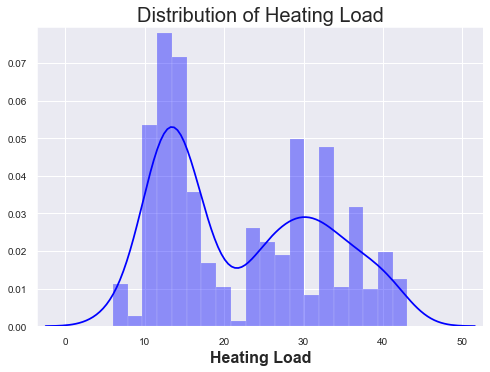

In [325]:
# plot histogram of heatingLoad
_ = sns.distplot(df_parameterData.Y1, color='b',bins=20)
plt.xlabel('Heating Load', fontsize=16, fontweight='bold')
plt.title('Distribution of Heating Load', fontsize=20)
plt.margins(0.02)
plt.show();

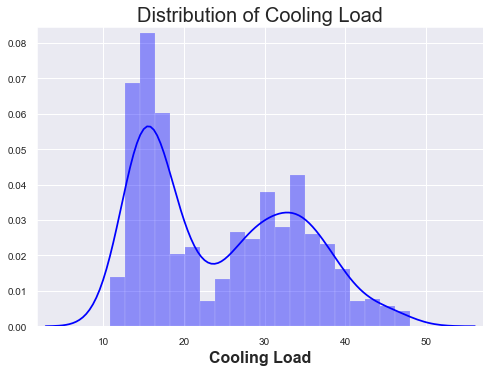

In [326]:
# plot histogram of CoolLoad
_ = sns.distplot(df_parameterData.Y2, color='b',bins=20)
plt.xlabel('Cooling Load', fontsize=16, fontweight='bold')
plt.title('Distribution of Cooling Load', fontsize=20)
plt.margins(0.02)
plt.show();

## Data Cleaning and Pre-processing

,relativeCompactness,surfaceArea,wallArea,roofArea,overallHeight,Orientation,glazingArea,glazingAreaDist,Y1,Y2
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


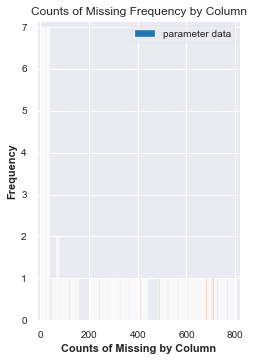

In [327]:
# Checking for missing data
df_parameterData.isnull()

# The data is small, there may not be missing data but we'll also plot to verify.

# Plots of missing values by column and row in datasets.
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
plt.subplot(121)
data=df_parameterData.isnull().sum()  #try label for legend
_ = plt.hist(df_parameterData, bins=20, label='parameter data')
_ = plt.title('Counts of Missing Frequency by Column')
_ = plt.xlabel('Counts of Missing by Column', fontweight='bold')
_ = plt.ylabel('Frequency', fontweight='bold')
_ = plt.legend(loc='upper right')
plt.margins(0.02)

## Exploratory Data Analysis

One of the business objectives is to uncover insights from the data analysis. Therefore, our goal here is to better understanding of our data and explore how the features relate to each other particularly, how they affects the responses Y1 and Y2 attributes/features. After EDA, we can then convert the response variables to categorical data type for prediction.

(array([ 64.,  64.,  64.,  64.,  64., 128.,  64.,  64.,  64., 128.]),
 array([514.5, 543.9, 573.3, 602.7, 632.1, 661.5, 690.9, 720.3, 749.7,
        779.1, 808.5]),
 <a list of 10 Patch objects>)

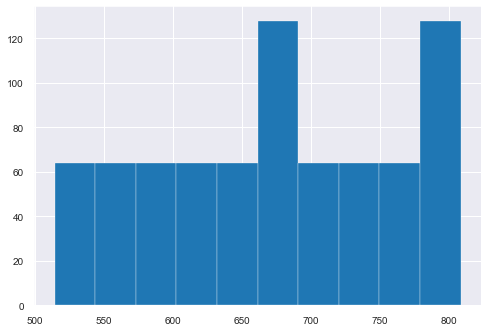

In [328]:
# histogram plots of independent features.
plt.hist(df_parameterData['surfaceArea'])
plt.show()

Due to the two spikes in the plot above, we'll use Line plots to illustrate the range and mode of this numerical variable. This can be very important for things like preventing bias and model overfit and even identifying collinearity.

Text(0.5, 0, 'Surface Area')

Text(0.5, 1.0, 'Distribution of Total Surface Area')

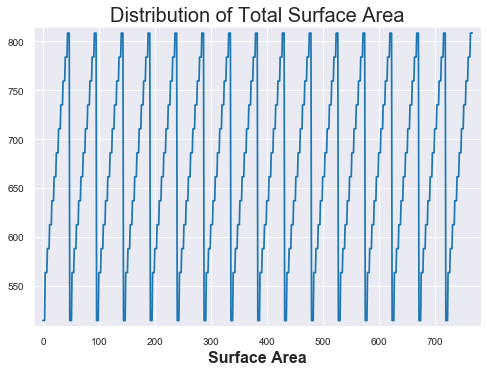

In [329]:
plt.plot(df_parameterData['surfaceArea'])
plt.xlabel('Surface Area', fontsize=16, fontweight='bold')
plt.title('Distribution of Total Surface Area', fontsize=20)
plt.margins(0.02)
plt.show()

### Scatter Plots

I'd like to compare certain two features (bivariate and multiple features (multivariate) to each other. This is very useful for understanding any possible relationships between the data, like surface area and roof area, though this relationship may not always point to any causal relationship.

1. In order to create a comparison of any two features we must first set the two features equal to variables as follows: 

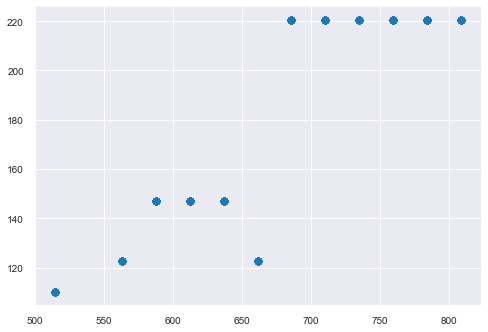

In [330]:
x = df_parameterData['surfaceArea']
y = df_parameterData['roofArea']

plt.scatter(x,y)
plt.show()

### Converting these dependent features to Integers so we can work it.

Of most interest are features that are correlated with our dependent variables. We can get a feel for that by calculating the correlation of all features and then filtering that result to see the correlation between features and responses.


In [331]:
# Convert independent features to integers. This is a very long way to convert float to int but pandas is not responding.
import pandas as pd
import numpy as np

#df_parameterData['relativeCompactness'] = df_parameterData['relativeCompactness'].astype(np.int64)
df_parameterData['surfaceArea'] = df_parameterData['surfaceArea'].astype(np.int64)
df_parameterData['glazingArea'] = df_parameterData['glazingArea'].astype(np.int64)
df_parameterData['wallArea'] = df_parameterData['wallArea'].astype(np.int64)
df_parameterData['roofArea'] = df_parameterData['roofArea'].astype(np.int64)
df_parameterData['overallHeight'] = df_parameterData['overallHeight'].astype(np.int64)
df_parameterData['Orientation'] = df_parameterData['Orientation'].astype(np.int64)
df_parameterData['glazingAreaDist'] = df_parameterData['glazingAreaDist'].astype(np.int64)
df_parameterData['Y1'] = df_parameterData['Y1'].astype(np.int64)
df_parameterData['Y2'] = df_parameterData['Y2'].astype(np.int64)
df_parameterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 relativeCompactness    768 non-null float64
surfaceArea             768 non-null int64
wallArea                768 non-null int64
roofArea                768 non-null int64
overallHeight           768 non-null int64
Orientation             768 non-null int64
glazingArea             768 non-null int64
glazingAreaDist         768 non-null int64
Y1                      768 non-null int64
Y2                      768 non-null int64
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [332]:
# drop relativeCompactness column due to limited data
newData = df_parameterData.drop([df_parameterData.columns[0]], axis = 'columns')
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
surfaceArea        768 non-null int64
wallArea           768 non-null int64
roofArea           768 non-null int64
overallHeight      768 non-null int64
Orientation        768 non-null int64
glazingArea        768 non-null int64
glazingAreaDist    768 non-null int64
Y1                 768 non-null int64
Y2                 768 non-null int64
dtypes: int64(9)
memory usage: 54.1 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1ffeeed00f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffeeeeb940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffeeed0a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffeef07eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffeef07ef0>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of surface Area')

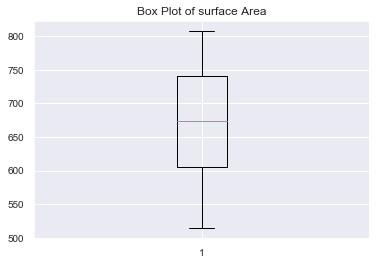

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffef0b2668>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffef0cbc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffef0b2cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffef0e71d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffef0e7240>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Wall Area')

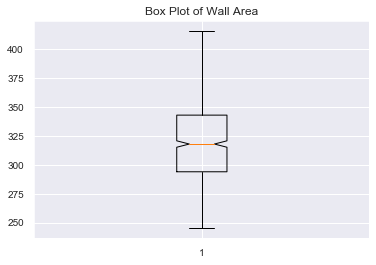

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffef295390>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffef2b0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffef295cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffef2caa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffef2d7748>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Roof Area')

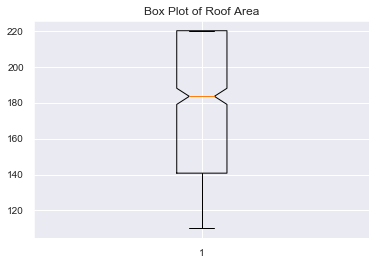

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffef46d630>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffef4875c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffef46d908>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffef493240>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffef4a0828>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Overall Height')

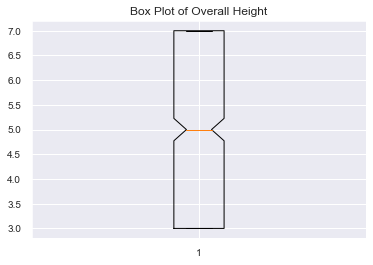

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffef66be48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffef684160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffef66b588>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffef693400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffef6a0cf8>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Orientation')

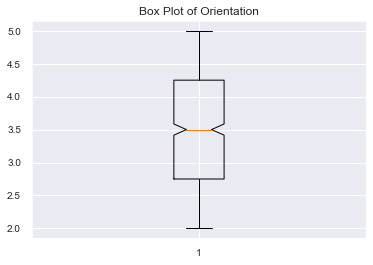

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffef84f7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffef86a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffef84f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffef878f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffef885908>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Glazing Area')

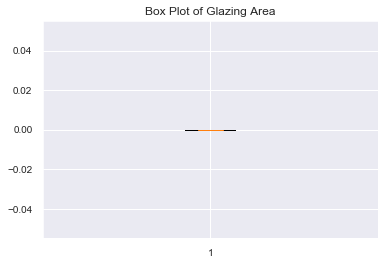

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffefa0b908>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffefa26b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffefa0b898>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffefa40fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffefa406a0>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Glazing Area Dist')

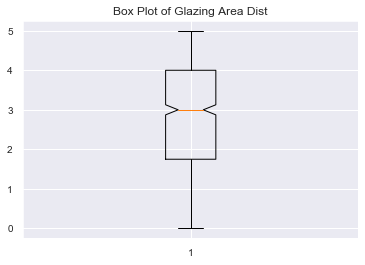

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffefbe2ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffefbef898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffefbd6f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffefc0b160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffefc18710>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Y1')

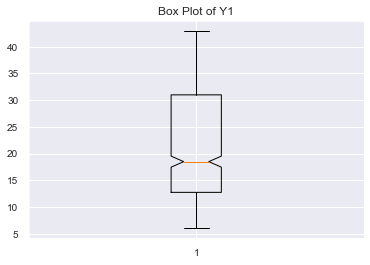

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffefdc6ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffefde2470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffefdc6550>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffefdfc668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffefdfccf8>],
 'means': []}

Text(0.5, 1.0, 'Box Plot of Y2')

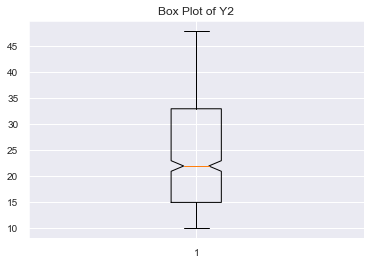

In [392]:
import matplotlib.pyplot as plt

b1 = newData['surfaceArea']
plt.boxplot(b1,0,'gD')
plt.title('Box Plot of surface Area')
plt.show()

b2 = newData['wallArea']
plt.boxplot(b2,1,'gD')
plt.title('Box Plot of Wall Area')
plt.show()

b3 = newData['roofArea']
plt.boxplot(b3,2,'gD')
plt.title('Box Plot of Roof Area')
plt.show()

b4 = newData['overallHeight']
plt.boxplot(b4,3,'gD')
plt.title('Box Plot of Overall Height')
plt.show()

b5 = newData['Orientation']
plt.boxplot(b5,4,'gD')
plt.title('Box Plot of Orientation')
plt.show()

b6 = newData['glazingArea']
plt.boxplot(b6,5,'gD')
plt.title('Box Plot of Glazing Area')
plt.show()

b6 = newData['glazingAreaDist']
plt.boxplot(b6,5,'gD')
plt.title('Box Plot of Glazing Area Dist')
plt.show()

b6 = newData['Y1']
plt.boxplot(b6,5,'gD')
plt.title('Box Plot of Y1')
plt.show()

b6 = newData['Y2']
plt.boxplot(b6,5,'gD')
plt.title('Box Plot of Y2')
plt.show()

In [335]:
newData.head()

,surfaceArea,wallArea,roofArea,overallHeight,Orientation,glazingArea,glazingAreaDist,Y1,Y2
0,514,294,110,7,2,0,0,15,21
1,514,294,110,7,3,0,0,15,21
2,514,294,110,7,4,0,0,15,21
3,514,294,110,7,5,0,0,15,21
4,563,318,122,7,2,0,0,20,28


In [336]:
#newDataDF = newData.drop([newData.columns[5]], axis = 'columns')
#newDataDF.info()

## Feature Engineering

Correlation
Using correlation to investigate and address any collinearity or checking for relationships between features for features selection or engineering. calculating correlation is a vital part of all Data Science projects and we will employ pandas or even numpy for this.

Mostly interested in features that are highly correlated with our dependent variables- Heating Load and Cooling Load. We can get a feel for that by calculating the correlation of all features and then filtering that result to see the correlation between features and responses.


                  surfaceArea  wallArea  roofArea  overallHeight  Orientation  \
surfaceArea      1.000000e+00  0.194125  0.880644      -0.858288     0.000000   
wallArea         1.941254e-01  1.000000 -0.293794       0.281577     0.000000   
roofArea         8.806443e-01 -0.293794  1.000000      -0.971698     0.000000   
overallHeight   -8.582879e-01  0.281577 -0.971698       1.000000     0.000000   
Orientation      0.000000e+00  0.000000  0.000000       0.000000     1.000000   
glazingAreaDist  3.557232e-16  0.000000  0.000000       0.000000     0.000000   
Y1              -6.568426e-01  0.456887 -0.860238       0.888479    -0.002486   
Y2              -6.722151e-01  0.428472 -0.861475       0.895374     0.014299   

                 glazingAreaDist        Y1        Y2  
surfaceArea         3.557232e-16 -0.656843 -0.672215  
wallArea            0.000000e+00  0.456887  0.428472  
roofArea            0.000000e+00 -0.860238 -0.861475  
overallHeight       0.000000e+00  0.888479  0.8953

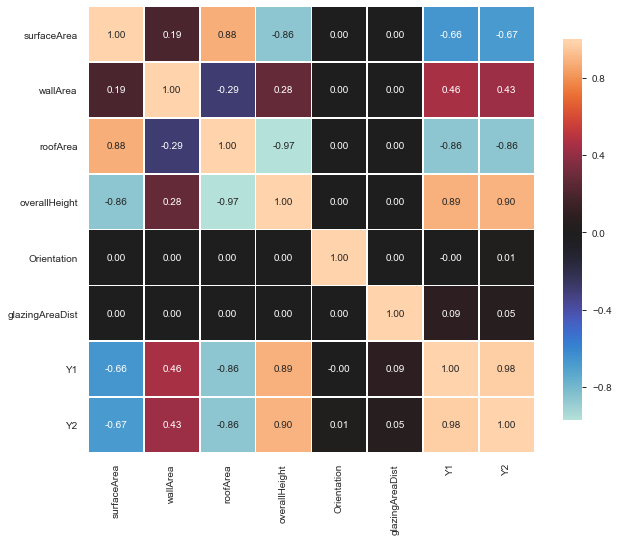

In [337]:
# Calculate correlation between features
def correlation_heatmap(newData):
    corrMat = newData.corr()
print(corrMat)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMat, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();
    
correlation_heatmap(newData)

Using Correlation, we can get some insights such as:

1. One or multiple attributes depend on another attribute or a cause (not always) for another attribute.
2. One or multiple attributes are associated with other attributes.

Considering the following usefulness of correlation:
- help in predicting one attribute from another, hence, great way to impute missing values.
- can (sometimes) indicate the presence of a causal relationship.
- used as a basic quantity for many modelling techniques.

Let’s get closer look at how this correlation metrics can be useful here. If the dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

#### Positive Correlation: 
means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1. From the table above, surfaceArea is strongly positively correlated with roofArea, wallArea, and glazingAreaDistribution. Intuitively, the roofArea may be caused by the surfaceArea. Additionally, overallHeight and glazingAreaDistribution are strongly positively correlated with both of our target variables (Y1 and Y2). These relationships may adversely affect the performamnce of our model, hence, overallHeight and glazingAreaDist will be deselected for model building.

#### Negative Correlation: 
on the other hand means if feature A increases then feature B decreases and vice versa. If there is a strong negative correlation, it will be represented by a value of -1. Looking at our matrics table, surfaceArea is very strongly negatively correlated with both Y1 and Y2, thus will be removed.

This leaves us with the followong features: roofArea, wallArea, and orientation.

### Covariance

Using correlation alone to understand the strength of relationships between any two variables isn't enough,can we ascertain the impact one feature has on another by calculating the Covariance to gauge the linear degree of change between the two variables. Simply put, we can use covariance to measure how changes in one feature are associated with changes in a second feature. This will be very important when studying the impact various features might have on heating load and cooling load responses. 

In [338]:
# calculate covariance

covMat = newDataDF.cov()
print(covMat)

                  surfaceArea     wallArea     roofArea  overallHeight  \
surfaceArea      7.759164e+03   747.713168  3493.246415    -151.280313   
wallArea         7.477132e+02  1895.155150  -576.229465      24.531943   
roofArea         3.493246e+03  -576.229465  2029.830508     -87.614081   
overallHeight   -1.512803e+02    24.531943   -87.614081       4.005215   
Orientation      0.000000e+00     0.000000     0.000000       0.000000   
glazingAreaDist -1.778673e-15     0.000000     0.000000       0.000000   
Y1              -5.850293e+02   199.215124  -390.895698      17.924381   
Y2              -5.626748e+02   177.923729  -369.080183      17.032595   

                 Orientation  glazingAreaDist          Y1          Y2  
surfaceArea         0.000000    -1.778673e-15 -585.029335 -562.674815  
wallArea            0.000000     0.000000e+00  199.215124  177.923729  
roofArea            0.000000     0.000000e+00 -390.895698 -369.080183  
overallHeight       0.000000     0.000000e+00

In [339]:
# convert target variables to categorical factors
#newDataDF['Y1'] = newDataDF.Y1.astype('category')

In [340]:
# Select features for model building

SEL_features = newData[['wallArea', 'roofArea', 'overallHeight', 'Orientation']]
print('Summary of Selected Predictor Features')
SEL_features.head()
SEL_features.info()

Summary of Selected Predictor Features


,wallArea,roofArea,overallHeight,Orientation
0,294,110,7,2
1,294,110,7,3
2,294,110,7,4
3,294,110,7,5
4,318,122,7,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
wallArea         768 non-null int64
roofArea         768 non-null int64
overallHeight    768 non-null int64
Orientation      768 non-null int64
dtypes: int64(4)
memory usage: 24.1 KB


In [341]:
# Select Dependent Variables

responseVar = newData[['Y1','Y2']]
print('Summary of Response Features')
responseVar.head()
responseVar.info()

Summary of Response Features


,Y1,Y2
0,15,21
1,15,21
2,15,21
3,15,21
4,20,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
Y1    768 non-null int64
Y2    768 non-null int64
dtypes: int64(2)
memory usage: 12.1 KB


In [342]:
# prep the selected predictors and target variables for model data partition
X = SEL_features
y = responseVar

X.head()
y.head()

,wallArea,roofArea,overallHeight,Orientation
0,294,110,7,2
1,294,110,7,3
2,294,110,7,4
3,294,110,7,5
4,318,122,7,2


,Y1,Y2
0,15,21
1,15,21
2,15,21
3,15,21
4,20,28


## Data Partition

Process Data Using Pipeline
In preparation for doing some initial screening of learning algorithms, we’ll process our x_train data with our pipeline. After removing features along with highly correlated features, we’ve reduced our feature set to 4 from 8 features.

For further processing and building predictive models, we want to split our training data into training and test sets. We want to train our models with the training set and assess the performance on unseen data which will be our test set created with train_test_split. 

In [343]:
# select train  and test sets, using 80/20 rule and set.seed at 500 using random_state
from sklearn.model_selection import train_test_split

# with Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

In [344]:
# verifying content of predictors and target

X_train.shape
X_test.shape
y_train.shape
y_test.shape
y_test.describe()

(614, 4)

(154, 4)

(614, 2)

(154, 2)

,Y1,Y2
count,154.000000,154.000000
mean,21.902597,24.227273
std,9.853681,9.352587
min,6.000000,11.000000
25%,13.000000,15.000000
50%,19.000000,22.000000
75%,29.000000,32.000000
max,42.000000,48.000000


## Model Selection
As part of the model selection effort, we’ll compare the cross-validated performance of several learning algorithms. From that list we’ll pick the most optimized models and improve its performance by tuning hyperparameters. To accomplish the initial screen of algorithms, we’ll fit into our models the training data and assess the performances by comparing the mean, RMSE and the standard deviation across the 10 folds of cross-validation. Scikit-learn’s cross_val_score() function and 10-fold cross-validation to help us rank order three algorithms.

## Model

In [360]:
# Linear Regression - Tuning Parameters and LR Model Definition

from sklearn.linear_model import LinearRegression

# Other Models
modelSVR = SVR()
modelRF = RandomForestRegressor()

In [368]:
# Linear Regression Model Fitting and Scoring

modelLM = LinearRegression()
modelLM.fit(X_train,y_train)

# Cross-validated Random Forest regression model
scores = cross_val_score(modelLM,
                         X_train,
                         y_train,
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

lm_rmse_scores = np.sqrt(-scores)
display_scores(lm_rmse_scores)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Scores: [4.23612054 3.73641461 4.11849121 4.47863913 4.08083574 3.911811
 3.75535025 3.73120425 4.22069766 3.60162674]
Mean: 3.9871191145155676
Standard deviation: 0.26842720865520386


In [358]:
# Function to asses performance of regression models
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [370]:
# Random Forest Regression Model Fitting and Scoring
#Model Fitting

modelRF = RandomForestRegressor(random_state=500)
modelRF.fit(X_train,y_train)

# Cross-validated Random Forest regression model
scores = cross_val_score(modelRF,
                         X_train,
                         y_train,
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=500, verbose=0,
                      warm_start=False)

Scores: [2.91032431 2.69072934 3.32357644 3.27039202 3.24055006 2.98793566
 3.15016177 3.3781116  3.00769173 2.88611976]
Mean: 3.0845592690255157
Standard deviation: 0.21131862498990978


In [371]:
# KNN Regressor
# Cross-validated KNN regression model

from sklearn.neighbors import KNeighborsRegressor

# Cross-validated K-nearest neighbors regression model
knn_Reg = KNeighborsRegressor()
knn_Reg.fit(X_train,y_train)
print(cross_val_score(knn_Reg, X_train, y_train)) 
scores = cross_val_score(knn_Reg,
                         X_train,
                         y_train,
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

knn_rmse_scores = np.sqrt(-scores)
display_scores(knn_rmse_scores)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consi

[0.89480756 0.88542448 0.8954801 ]
Scores: [2.93867427 2.91658218 3.48137904 3.3020033  3.28443922 3.04464055
 3.16253685 3.45258278 3.05876864 2.9155884 ]
Mean: 3.1557195228887283
Standard deviation: 0.20393439467819588


## Model Selection

Finally, we’ll make predictions on our test set and assess the RMSE. With the RF model the RMSE which compared favorably to the other models.

## Making Predictions

In [372]:
# Use RF model to make predictionns on the unseen test data

pred = modelRF.predict(X_test)
predRsquared = r2_score(y_test, pred)
rmse = sqrt(mean_squared_error(y_test, pred))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

#mse_scores= mean_squared_error(y_test, pred)
#rmse_scores=np.sqrt(mse_scores)
#print(rmse_scores.mean())



R Squared: 0.893
RMSE: 3.136


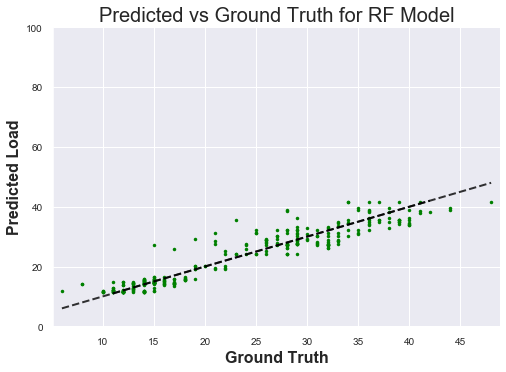

In [383]:
# We can visualize our prediction results by plotting the predicted versus actual values.

# plot of predicted vs actual values for RF model
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
_ = plt.plot(y_test, pred, marker='.', color= 'green', linestyle='none')
_ = plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, alpha=0.8)
_ = plt.title('Predicted vs Ground Truth for RF Model', fontsize=20)
_ = plt.xlabel('Ground Truth',fontweight='bold', fontsize=16)
_ = plt.ylabel('Predicted Load', fontweight='bold', fontsize=16)
_ =  plt.ylim(0,100)
plt.margins(0.02)
plt.show();

## Feature Importance

Finding Important Features in Scikit-learn
Finding important features or selecting features in the dataset. In scikit-learn, we'll perform this task in the following steps:

create a random forests model.
use the feature importance variable to see feature importance scores.
visualize these scores using the seaborn library.

In [388]:
import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

overallHeight    0.517895
roofArea         0.355373
wallArea         0.120130
Orientation      0.006601
dtype: float64

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


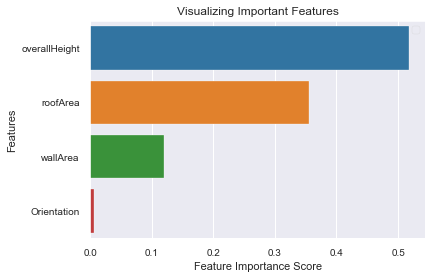

In [391]:
# Plot feature importances for RF model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Prediction on Test Set
The RF regression model showed the best performance on unseen data than other models.


## Conclusion

In conclusion, predictive regression models were built to predict Heating Load Cooling Load. The best performing model was the Random Forest regression model with a RMSE on unseen test data of 3.2 and R-Squared of 0.89. Aside from building a high-performance model, this task also focused on which of the building parameters (attributes) are best for building an optimized model for prediction of Heating Load  and Cooling Load responses.

Initial EDA determined that many of the features were either highly positively or negatively correlated with Heating Load and Cooling Load. Counter intuitively, features (parameters) like Surface Areas, Glazing Area, Galzing Area Distribution, were either very highly positively or negatively correlated to the responses, hence could not help to predict building efficiency. Interestingly, features that showed the least correlation with responses were features Orientation and Wall Area but were also least importance to the model. Overall Heaight appeared to have the most impact on Heating Load and Cooling Load, hence was found by Random Forest model to be most important parameter.

